In [1]:
import sys
import os

# Inserting siebling folder to sys. Ensures other code can be ran
# Note: Must have breast_cancer_classifier folder in the parent of the current folder
sys.path.insert(1, os.path.abspath("../breast_cancer_classifier"))

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

import numpy as np

from src.modeling.run_model_single import (
    load_model, load_inputs, process_augment_inputs, batch_to_tensor
)
import src.utilities.pickling as pickling

In /home/frfa/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/frfa/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/frfa/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
import pandas as pd

In [4]:
shared_parameters = {
    "device_type": "cpu", #gpu
    "gpu_number": 0,
    "max_crop_noise": (100, 100),
    "max_crop_size_noise": 100,
    "batch_size": 1,
    "seed": 0,
    "augmentation": True,
    "use_hdf5": True,
}

In [6]:
 # Subsetting only full mammograms
meta_df = meta_df[meta_df["Series Description"] == "full mammogram images"]

In [7]:
# Subsetting standardized test cases
calc_test_df = meta_df[meta_df["Subject ID"].str.contains("Calc-Test")]
mass_test_df = meta_df[meta_df["Subject ID"].str.contains("Mass-Test")]

print(
    len(calc_test_df),
    len(mass_test_df)
)

284 361


# Converting DICOMs to PNGs

Using own function all_inbreast_to_png

In [8]:
from dicom_to_png16 import all_ddsm_to_png

In [10]:
calc_test_df = all_ddsm_to_png(calc_test_df, basepath)

Directory  png_versions  already exists


/home/frfa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/frfa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Directory  png_versions  already exists
Directory  png_versions  already exists
Directory  png_versions  already exists
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
10
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
20
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
30
Directory  png_versio

240
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
250
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
260
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Directory  png_versions  Created 
Di

In [11]:
calc_test_df

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,...,SOP Class Name,SOP Class UID,Number of Images,Unnamed: 14,File Size,File Location,Download Timestamp,png_path,png_filename,png_base
2,1.3.6.1.4.1.9590.100.1.2.374115997511889073021...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Calc-Test_P_00038_LEFT_CC,1.3.6.1.4.1.9590.100.1.2.859354343102033567126...,NaN,08-29-2017,full mammogram images,NaN,...,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,27,84 MB,.\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC\08-29-20...,2022-02-28T21:13:35.311,../data/cbis-ddsm/manifest-ZkhPvrLo52167308727...,1-1.png,../data/cbis-ddsm/manifest-ZkhPvrLo52167308727...
3,1.3.6.1.4.1.9590.100.1.2.174390361112646747718...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Calc-Test_P_00038_LEFT_MLO,1.3.6.1.4.1.9590.100.1.2.384159464510350889125...,NaN,08-29-2017,full mammogram images,NaN,...,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,28,97 MB,.\CBIS-DDSM\Calc-Test_P_00038_LEFT_MLO\08-29-2...,2022-02-28T21:13:36.483,../data/cbis-ddsm/manifest-ZkhPvrLo52167308727...,1-1.png,../data/cbis-ddsm/manifest-ZkhPvrLo52167308727...
5,1.3.6.1.4.1.9590.100.1.2.263861248711313923336...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Calc-Test_P_00038_RIGHT_CC,1.3.6.1.4.1.9590.100.1.2.177706148911820252341...,NaN,08-29-2017,full mammogram images,NaN,...,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,25,73 MB,.\CBIS-DDSM\Calc-Test_P_00038_RIGHT_CC\08-29-2...,2022-02-28T21:13:50.957,../data/cbis-ddsm/manifest-ZkhPvrLo52167308727...,1-1.png,../data/cbis-ddsm/manifest-ZkhPvrLo52167308727...
9,1.3.6.1.4.1.9590.100.1.2.442624602111129305133...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Calc-Test_P_00038_RIGHT_MLO,1.3.6.1.4.1.9590.100.1.2.328421320411501709324...,NaN,08-29-2017,full mammogram images,NaN,...,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,27,64 MB,.\CBIS-DDSM\Calc-Test_P_00038_RIGHT_MLO\08-29-...,2022-02-28T21:14:25.869,../data/cbis-ddsm/manifest-ZkhPvrLo52167308727...,1-1.png,../data/cbis-ddsm/manifest-ZkhPvrLo52167308727...
11,1.3.6.1.4.1.9590.100.1.2.272917492411709393015...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Calc-Test_P_00041_LEFT_CC,1.3.6.1.4.1.9590.100.1.2.696920639136398753090...,NaN,08-29-2017,full mammogram images,NaN,...,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,45,13 MB,.\CBIS-DDSM\Calc-Test_P_00041_LEFT_CC\08-29-20...,2022-02-28T21:15:00.196,../data/cbis-ddsm/manifest-ZkhPvrLo52167308727...,1-1.png,../data/cbis-ddsm/manifest-ZkhPvrLo52167308727...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,1.3.6.1.4.1.9590.100.1.2.242128209412592948513...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Calc-Test_P_02464_RIGHT_MLO,1.3.6.1.4.1.9590.100.1.2.132696601911685338902...,NaN,08-29-2017,full mammogram images,NaN,...,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,67,95 MB,.\CBIS-DDSM\Calc-Test_P_02464_RIGHT_MLO\08-29-...,2022-03-01T07:52:56.287,../data/cbis-ddsm/manifest-ZkhPvrLo52167308727...,1-1.png,../data/cbis-ddsm/manifest-ZkhPvrLo52167308727...
603,1.3.6.1.4.1.9590.100.1.2.277098686410919869923...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Calc-Test_P_02498_RIGHT_CC,1.3.6.1.4.1.9590.100.1.2.417835510412813100540...,NaN,08-29-2017,full mammogram images,NaN,...,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,25,33 MB,.\CBIS-DDSM\Calc-Test_P_02498_RIGHT_CC\08-29-2...,2022-03-01T07:53:09.434,../data/cbis-ddsm/manifest-ZkhPvrLo52167308727...,1-1.png,../data/cbis-ddsm/manifest-ZkhPvrLo52167308727...
604,1.3.6.1.4.1.9590.100.1.2.258951180113994815379...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Calc-Test_P_02498_RIGHT_MLO,1.3.6.1.4.1.9590.100.1.2.234958198411349241611...,NaN,08-29-2017,full mammogram images,Na

# Cropping images

This is done to reduce the size of the images before inputting to models.

In [20]:
# Github library
import src.cropping.crop_single as crop_single
import pathlib

import os.path
from os import path

In [26]:
count = 0
for row in calc_test_df.itertuples():
    count += 1
    if count % 5 == 0:
        print(count)    
        
    if path.exists(str(pathlib.PurePosixPath(row.png_base / "cropped" / row.png_filename))) \
    and path.exists(str(pathlib.PurePosixPath(row.png_base / "cropped" / row.png_filename.replace(".png", ".pkl")))):
        print("Cropped image already exist. Skipping. Count: ", count)
        continue

    subject_id = row._5.split("_")
    
    crop_single.crop_single_mammogram(
        str(pathlib.PurePosixPath(row.png_path)),
        "NO",
        subject_id[-2][0] + "-" + subject_id[-1], #row.Laterality + "-" + row.View,
        str(pathlib.PurePosixPath(row.png_base / "cropped" / row.png_filename)),
        str(pathlib.PurePosixPath(row.png_base / "cropped" / row.png_filename.replace(".png", ".pkl"))),
        1,
        50,
    )

Cropped image already exist. Skipping. Count:  1
Cropped image already exist. Skipping. Count:  2
Cropped image already exist. Skipping. Count:  3
Cropped image already exist. Skipping. Count:  4
5
Cropped image already exist. Skipping. Count:  5
Cropped image already exist. Skipping. Count:  6
Cropped image already exist. Skipping. Count:  7
Cropped image already exist. Skipping. Count:  8
Cropped image already exist. Skipping. Count:  9
10
Cropped image already exist. Skipping. Count:  10
Cropped image already exist. Skipping. Count:  11
Cropped image already exist. Skipping. Count:  12
Cropped image already exist. Skipping. Count:  13
Cropped image already exist. Skipping. Count:  14
15
Cropped image already exist. Skipping. Count:  15
Cropped image already exist. Skipping. Count:  16
Cropped image already exist. Skipping. Count:  17
Cropped image already exist. Skipping. Count:  18
Cropped image already exist. Skipping. Count:  19
20
Cropped image already exist. Skipping. Count:  2

KeyboardInterrupt: 

In [28]:
calc_test_df = calc_test_df.iloc[:21]

# Get optimal centers

In [29]:
# Github library
import src.optimal_centers.get_optimal_center_single as center_single

In [30]:
for row in calc_test_df.itertuples():
    if row.Index % 10 == 0:
        print("Done with row " + str(row.Index))
        
    center_single.get_optimal_center_single(
        str(pathlib.PurePosixPath(row.png_base / "cropped" / row.png_filename)), # cropped_mammogram_path,
        str(pathlib.PurePosixPath(row.png_base / "cropped" / row.png_filename.replace(".png", ".pkl"))) # metadata_path
    )

Done with row 30


# Bulk Image-Only Model Predictions

A dictionary containing the configuration parameters for image-only model, and load the corresponding weights.

In [32]:
def make_pred(shared_parameters, row, meta_df):
    subject_id = row._5.split("_")
    
    random_number_generator = np.random.RandomState(shared_parameters["seed"])

    image_only_parameters = shared_parameters.copy()
    image_only_parameters["view"] = subject_id[-2][0] + "-" + subject_id[-1]  # row.Laterality + "-" + row.View #"L-CC"
    image_only_parameters["use_heatmaps"] = False
    image_only_parameters["model_path"] = "../breast_cancer_classifier/models/ImageOnly__ModeImage_weights.p"
    model, device = load_model(image_only_parameters)
    
    model_input = load_inputs(
    image_path = str(pathlib.PurePosixPath(row.png_base / "cropped" / row.png_filename)), #"sample_single_output/cropped.png",
    metadata_path = str(pathlib.PurePosixPath(row.png_base / "cropped" / row.png_filename.replace(".png", ".pkl"))),  #"sample_single_output/cropped_metadata.pkl",
    use_heatmaps=False,
    )
    
    batch = [
        process_augment_inputs(
            model_input=model_input,
            random_number_generator=random_number_generator,
            parameters=image_only_parameters,
        ),
    ]
    tensor_batch = batch_to_tensor(batch, device)
    
    y_hat = model(tensor_batch)
    
    predictions = np.exp(y_hat.cpu().detach().numpy())[:, :2, 1]
    predictions_dict = {
        "benign": float(predictions[0][0]),
        "malignant": float(predictions[0][1]),
    }
    
    # Assign probabilities to df location
    meta_df.loc[meta_df["png_path"] == row.png_path, "benign"] = float(predictions[0][0])
    meta_df.loc[meta_df["png_path"] == row.png_path, "malignant"] = float(predictions[0][1])
    
    return predictions_dict

In [33]:
calc_test_df["benign"] = 0
calc_test_df["malignant"] = 0

/home/frfa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/frfa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
predictions = []
for row in calc_test_df.itertuples():
    print(row.Index)
        
    predictions.append(
        make_pred(shared_parameters, row, calc_test_df)
    )

2


/home/frfa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


3
5
9
11
13
14
16
21
23
26
27
28
30
33
36
39
42
45
46
49


# Joining with label data

After predictions, join data with the label data

In [67]:
basepath = "../data/cbis-ddsm/manifest-ZkhPvrLo5216730872708713142"
calc_case_description_test_set = pd.read_csv(
    "../data/cbis-ddsm/calc_case_description_test_set.csv"
)

In [68]:
len(calc_case_description_test_set["image file path"].unique())

284

Removes cases with ambiguous labels, as those correspond to ROI-level labels (rather than whole image)

In [69]:
new_df = calc_case_description_test_set.groupby(["image file path"])["pathology"].nunique().reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
multi_pathology = list(new_df[new_df["count"] > 1]["image file path"])

calc2 = calc_case_description_test_set[~calc_case_description_test_set["image file path"].isin(multi_pathology)]

In [106]:
calc_case_description_test_set.groupby(["image file path"])["pathology"].nunique().reset_index(name='count') \
                             .sort_values(['count'], ascending=False)

,image file path,count
51,Calc-Test_P_00353_LEFT_MLO/1.3.6.1.4.1.9590.10...,2
50,Calc-Test_P_00353_LEFT_CC/1.3.6.1.4.1.9590.100...,2
0,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,1
213,Calc-Test_P_01538_RIGHT_MLO/1.3.6.1.4.1.9590.1...,1
193,Calc-Test_P_01460_RIGHT_CC/1.3.6.1.4.1.9590.10...,1
...,...,...
102,Calc-Test_P_00774_RIGHT_MLO/1.3.6.1.4.1.9590.1...,1
103,Calc-Test_P_00789_LEFT_MLO/1.3.6.1.4.1.9590.10...,1
104,Calc-Test_P_00790_RIGHT_CC/1.3.6.1.4.1.9590.10...,1
105,Calc-Test_P_00790_RIGHT_MLO/1.3.6.1.4.1.9590.1...,1


In [70]:
calc2["Subject ID"] = calc2["image file path"].str.split("/").str[0]

/home/frfa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Merge the datasets

In [71]:
new_df = calc_test_df.merge(calc2, on="Subject ID")

In [72]:
new_df.columns

Index(['Series UID', 'Collection', '3rd Party Analysis',
       'Data Description URI', 'Subject ID', 'Study UID', 'Study Description',
       'Study Date', 'Series Description', 'Manufacturer', 'Modality',
       'SOP Class Name', 'SOP Class UID', 'Number of Images', 'Unnamed: 14',
       'File Size', 'File Location', 'Download Timestamp', 'png_path',
       'png_filename', 'png_base', 'benign', 'malignant', 'patient_id',
       'breast density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'calc type', 'calc distribution',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')

In [73]:
new_df.drop_duplicates(subset=["Subject ID"], inplace=True)

In [74]:
new_df["pathology"].unique()

array(['BENIGN', 'BENIGN_WITHOUT_CALLBACK', 'MALIGNANT'], dtype=object)

# Making ROC curve

Used for AUC.

In [99]:
new_df["pred_y"] = "benign"
new_df.loc[new_df["benign"] < new_df["malignant"], "pred_y"] = "malignant"

new_df["true_y"] = "benign"
new_df.loc[(new_df["pathology"] == "MALIGNANT"), "true_y"] = "malignant"

new_df["true_y_assmnt"] = "benign"
new_df.loc[(new_df["assessment"] > 3), "true_y_assmnt"] = "malignant"

In [76]:
new_df["benign_perc"] = new_df["benign"] / (new_df["benign"] + new_df["malignant"])
new_df["malignant_perc"] = new_df["malignant"] / (new_df["benign"] + new_df["malignant"])

In [78]:
from sklearn import metrics

In [79]:
# ROC malignant / not-malignant
y = np.array(
    new_df["true_y"]
)
y = np.where(y != "malignant", 0, y)
y = np.where(y == "malignant", 1, y)
y = np.int_(y)

pred_y = np.array(
    new_df["malignant"]
)

In [80]:
# ROC benign / not-benign
y2 = np.array(
    new_df["true_y"]
)
y2 = np.where(y2 != "benign", 0, y2)
y2 = np.where(y2 == "benign", 1, y2)
y2 = np.int_(y2)

pred_y2 = np.array(
    new_df["benign"]
)

In [81]:
print(y, pred_y)
print(y2, pred_y2)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0] [0.02860506 0.01615462 0.0517529  0.02041371 0.00852739 0.02367725
 0.02214818 0.00895614 0.02195695 0.05163709 0.08895517 0.01273464
 0.06455446 0.0041654  0.011981   0.02239704 0.01012823 0.0327755
 0.01209174 0.01076393 0.01658451]
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1] [0.13628852 0.27960953 0.15998389 0.10530236 0.04431901 0.17946889
 0.15307263 0.22072974 0.62102288 0.3475005  0.21731591 0.09010111
 0.47618821 0.03091278 0.05971241 0.08497679 0.1658698  0.07363429
 0.1186532  0.43511268 0.15567358]


In [82]:
# malignant
fpr, tpr, thresholds = metrics.roc_curve(y, pred_y, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# benign
fpr2, tpr2, thresholds2 = metrics.roc_curve(y2, pred_y2, pos_label=1)
roc_auc2 = metrics.auc(fpr2, tpr2)

In [83]:
print(fpr, tpr)
print(fpr2, tpr2)

[0.         0.05263158 0.05263158 0.73684211 0.73684211 1.        ] [0.  0.  0.5 0.5 1.  1. ]
[0.  0.  0.5 0.5 1.  1. ] [0.         0.05263158 0.05263158 0.89473684 0.89473684 1.        ]


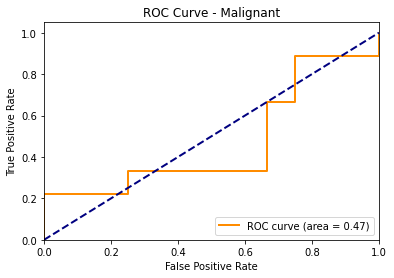

In [109]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Malignant")
plt.legend(loc="lower right")
plt.show()

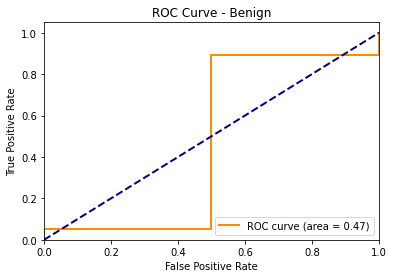

In [85]:
plt.figure()
lw = 2
plt.plot(
    fpr2,
    tpr2,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc2,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Benign")
plt.legend(loc="lower right")
plt.show()

In [100]:
new_df.loc[:,["benign", "malignant", "assessment", "pathology", "true_y", "true_y_assmnt"]]

,benign,malignant,assessment,pathology,true_y,true_y_assmnt
0,0.136289,0.028605,4,BENIGN,benign,malignant
1,0.279610,0.016155,4,BENIGN,benign,malignant
2,0.159984,0.051753,2,BENIGN_WITHOUT_CALLBACK,benign,benign
4,0.105302,0.020414,2,BENIGN_WITHOUT_CALLBACK,benign,benign
6,0.044319,0.008527,2,BENIGN_WITHOUT_CALLBACK,benign,benign
7,0.179469,0.023677,2,BENIGN_WITHOUT_CALLBACK,benign,benign
8,0.153073,0.022148,2,BENIGN_WITHOUT_CALLBACK,benign,benign
9,0.220730,0.008956,2,BENIGN_WITHOUT_CALLBACK,benign,benign
10,0.621023,0.021957,2,BENIGN_WITHOUT_CALLBACK,benign,benign
12,0.347501,0.051637,2,BENIGN_WITHOUT_CALLBACK,benign,benign


In [88]:
new_df.columns

Index(['Series UID', 'Collection', '3rd Party Analysis',
       'Data Description URI', 'Subject ID', 'Study UID', 'Study Description',
       'Study Date', 'Series Description', 'Manufacturer', 'Modality',
       'SOP Class Name', 'SOP Class UID', 'Number of Images', 'Unnamed: 14',
       'File Size', 'File Location', 'Download Timestamp', 'png_path',
       'png_filename', 'png_base', 'benign', 'malignant', 'patient_id',
       'breast density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'calc type', 'calc distribution',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path', 'pred_y', 'true_y',
       'benign_perc', 'malignant_perc'],
      dtype='object')

# With assessment instead of true pathology

In [101]:
# ROC malignant / not-malignant
y = np.array(
    new_df["true_y_assmnt"]
)
y = np.where(y != "malignant", 0, y)
y = np.where(y == "malignant", 1, y)
y = np.int_(y)

pred_y = np.array(
    new_df["malignant"]
)

In [102]:
# ROC benign / not-benign
y2 = np.array(
    new_df["true_y_assmnt"]
)
y2 = np.where(y2 != "benign", 0, y2)
y2 = np.where(y2 == "benign", 1, y2)
y2 = np.int_(y2)

pred_y2 = np.array(
    new_df["benign"]
)

In [103]:
# malignant with assessment
fpr, tpr, thresholds = metrics.roc_curve(y, pred_y, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# benign with assessment
fpr2, tpr2, thresholds2 = metrics.roc_curve(y2, pred_y2, pos_label=1)
roc_auc2 = metrics.auc(fpr2, tpr2)

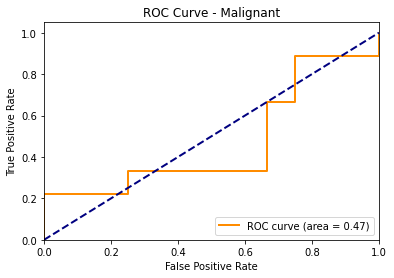

In [104]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Malignant")
plt.legend(loc="lower right")
plt.show()

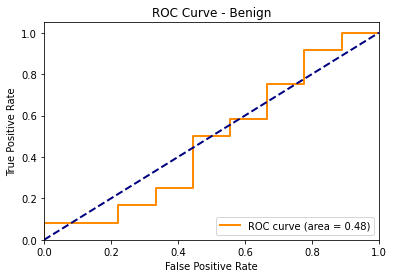

In [105]:
plt.figure()
lw = 2
plt.plot(
    fpr2,
    tpr2,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc2,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Benign")
plt.legend(loc="lower right")
plt.show()

In [ ]:
Calc-Test_P_00038_LEFT_CC

In [113]:
new_df[new_df["Subject ID"] == "Calc-Test_P_00038_LEFT_CC"].loc[:,["benign", "malignant"]]

,benign,malignant
0,0.136289,0.028605


In [111]:
new_df.columns

Index(['Series UID', 'Collection', '3rd Party Analysis',
       'Data Description URI', 'Subject ID', 'Study UID', 'Study Description',
       'Study Date', 'Series Description', 'Manufacturer', 'Modality',
       'SOP Class Name', 'SOP Class UID', 'Number of Images', 'Unnamed: 14',
       'File Size', 'File Location', 'Download Timestamp', 'png_path',
       'png_filename', 'png_base', 'benign', 'malignant', 'patient_id',
       'breast density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'calc type', 'calc distribution',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path', 'pred_y', 'true_y',
       'benign_perc', 'malignant_perc', 'true_y_assmnt'],
      dtype='object')